In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from model_explore.pytorch import localize, evaluate, utils
import matplotlib.pyplot as plt
import numpy as np
import copick

In [3]:
copick_config_path = "/mnt/simulations/ml_challenge/ml_config.json"
root = copick.from_file(copick_config_path)

objects = []
for obj in root.pickable_objects:
    if obj.is_particle:
        objects.append((obj.name, obj.label, obj.radius))

#### Run Localization on Segmentation Network Predictions

In [6]:
run = root.get_run('TS_17')

localize.processs_localization(
    run, 
    objects,
    'prediction',
    method='com',
    pick_session_id='5',
)

100%|██████████| 236/236 [02:41<00:00,  1.46it/s]


(np.float64(499.4620253164557), np.float64(199.9789029535865), np.float64(10.886075949367088))


100%|██████████| 45/45 [00:30<00:00,  1.47it/s]


(np.float64(205.96045197740114), np.float64(537.3804143126177), np.float64(5.5386064030131825))


100%|██████████| 53/53 [00:36<00:00,  1.46it/s]


(np.float64(475.96544334315564), np.float64(527.3514599517814), np.float64(16.802035896062147))


100%|██████████| 17/17 [00:11<00:00,  1.47it/s]


(np.float64(565.8201908588649), np.float64(149.79652882415314), np.float64(84.05078408393325))


100%|██████████| 67/67 [00:45<00:00,  1.46it/s]


(np.float64(216.16019760056457), np.float64(542.4601270289344), np.float64(3.984474241354975))


100%|██████████| 26/26 [00:17<00:00,  1.47it/s]

(np.float64(92.39282192861369), np.float64(55.945178465785844), np.float64(21.88937093275488))


In [7]:
run = root.get_run('TS_17')
voxel_size = 10

tomo = run.get_voxel_spacing(10).get_tomogram('wbp').numpy()
seg = run.get_segmentations(name='prediction')[0].numpy()

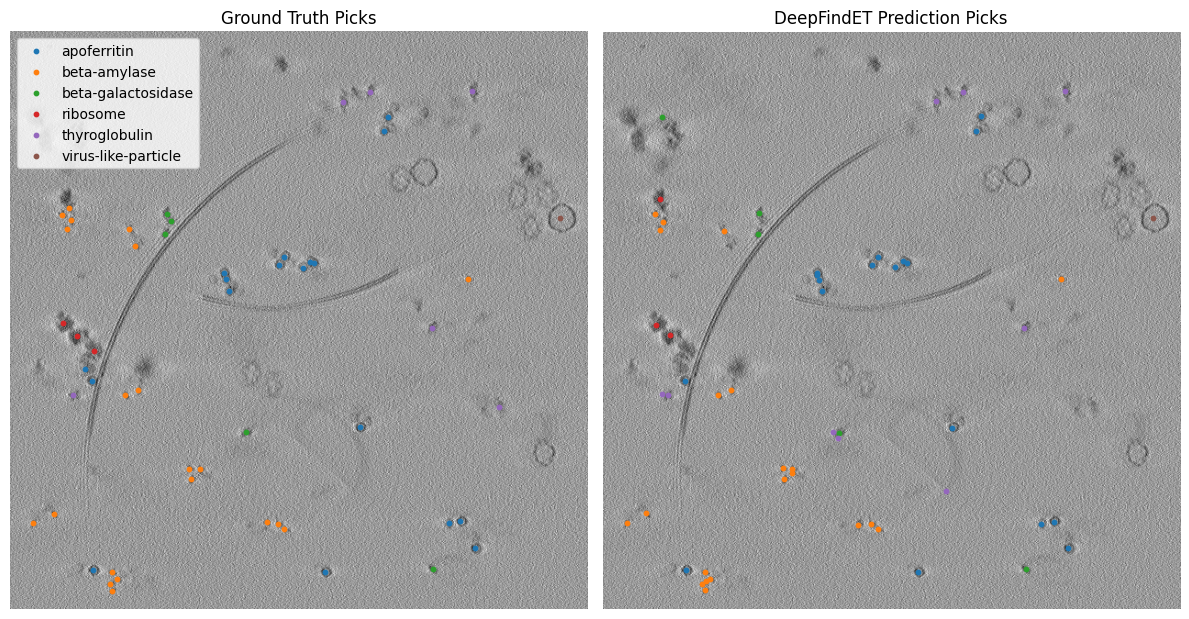

In [10]:
# Tomogram Slice to Display
volSlice = 90
gt_user_id = 'polnet'
pick_user_id = 'monai'

# Threshold for how close a point needs to be to the slice to be considered
slice_proximity_threshold = 5 

# Plot the images
plt.figure(figsize=(12, 12))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Ground Truth Picks')
plt.imshow(tomo[volSlice,],cmap='gray')
plt.axis('off')

# Plot each object from ground truth data
for obj in objects:
    
    # Retrieve the pick points for the current object from ground truth data
    coordinates = utils.get_copick_coordinates(run, obj[0], gt_user_id)
    
    # Find points that are closest to the slice at Z = volSlice (90)
    close_points = coordinates[np.abs(coordinates[:, 0] - volSlice) <= slice_proximity_threshold]

    # Plot the points on the image
    plt.scatter(close_points[:, 2], close_points[:, 1], label=obj[0], s=10)

plt.legend()

# Predicted Picks Image
plt.subplot(1, 2, 2)
plt.title('DeepFindET Prediction Picks')
plt.imshow(tomo[volSlice,],cmap='gray')
plt.axis('off')

# Plot each object from DeepFindET predictions
for obj in objects:
    
    # Retrieve the pick points for the current object from ground truth data
    coordinates = utils.get_copick_coordinates(run, obj[0], pick_user_id)

    # Find points that are closest to the slice at Z = volSlice (90)
    close_points = coordinates[np.abs(coordinates[:, 0] - volSlice) <= slice_proximity_threshold]

    # Plot the points on the image
    plt.scatter(close_points[:, 2], close_points[:, 1], label=obj[0], s=10)


# plt.legend()
plt.tight_layout()
plt.show()

##### Evaulate the Localized Picks

In [13]:
eval = evaluate.evaluator(
    copick_config_path,
    gt_user_id,
    None,
    pick_user_id,
    None,
)

Running Evaluation on the Following Copick Project:  /mnt/simulations/ml_challenge/ml_config.json

Ground Truth Query: 
UserID: polnet, SessionID: None

Submitted Picks: 
UserID: monai, SessionID: None
No object names provided, using all pickable objects


In [15]:
eval.run('TS_17')

Running Metrics Evaluation on the Following RunIDs:  TS_17


AttributeError: 'NoneType' object has no attribute 'pickable_objects'

eval = evaluate.evaluator(
    copick_config_path,
    gt_user_id,
    None,
    pick_user_id,
    None,
)